# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [138]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uid        1686 non-null   object        
 1   labname    1686 non-null   object        
 2   numTrials  1686 non-null   int64         
 3   timestamp  1686 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 52.8+ KB


In [139]:
df['hour'] = df.timestamp.dt.hour
df['dayofweek'] = df.timestamp.dt.dayofweek
df = df.drop(['timestamp'], axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [140]:
categorical_features = ['uid', 'labname']
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[categorical_features])

In [141]:
df = df.drop(columns=categorical_features)
df

,numTrials,hour,dayofweek
0,1,5,4
1,2,5,4
2,3,5,4
3,4,5,4
4,5,5,4
...,...,...,...
1681,9,20,3
1682,6,20,3
1683,7,20,3
1684,8,20,3


In [142]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [143]:
scaler = StandardScaler()
continuous_features = ['numTrials', 'hour']
df[continuous_features] = scaler.fit_transform(df[continuous_features])

df.to_csv('../data/dayofweek.csv', index=False)

In [144]:
most_common_class = df['dayofweek'].mode()[0]
naive_accuracy = (df['dayofweek'] == most_common_class).mean()
float(naive_accuracy)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [145]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']


clf = LogisticRegression(random_state=21, fit_intercept=False, multi_class='ovr', solver='liblinear')
clf.fit(X, y)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'liblinear'
,max_iter,100
,multi_class,'ovr'


In [146]:
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
accuracy

0.6215895610913404

In [147]:
def plot_top_coefficients(coefficients, feature_names, top_n=10):
    feature_importance = np.sum(np.abs(coefficients), axis=0)
    top_indices = np.argsort(feature_importance)[-top_n:]
    top_features = [feature_names[i] for i in top_indices]
    top_importance = feature_importance[top_indices]
    plt.figure(figsize=(8,6))
    plt.barh(top_features, top_importance)
    plt.xlabel('Sum of absolute coefficient values across classes')
    plt.title(f'Top {top_n} feature importances')
    plt.show()

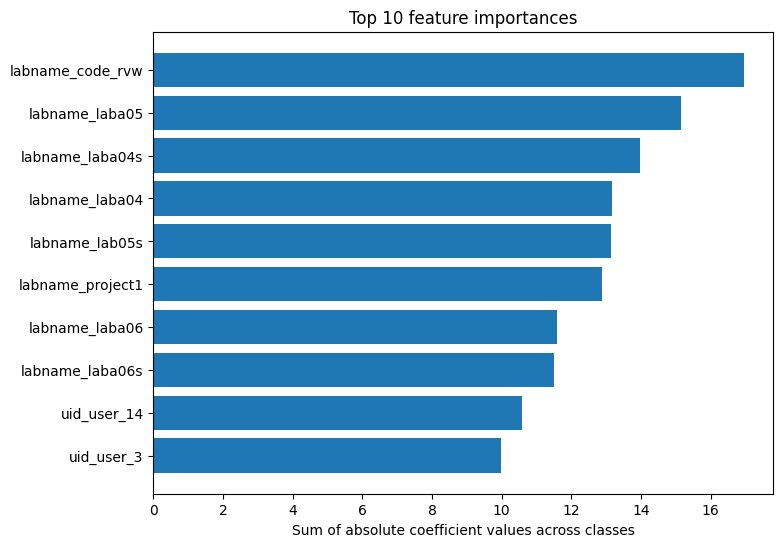

In [148]:
feature_names = X.columns

plot_top_coefficients(clf.coef_, feature_names, top_n=10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [149]:
svc_linear = OneVsRestClassifier(
    SVC(kernel='linear', probability=True, random_state=21)
)
svc_linear.fit(X, y)


,estimator,SVC(kernel='l...ndom_state=21)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001


In [150]:
y_pred_linear = svc_linear.predict(X)
accuracy_linear = accuracy_score(y, y_pred_linear)
accuracy_linear

0.6115065243179122

In [151]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = ''

for kernel in kernels:
    if kernel == 'linear':
        model = OneVsRestClassifier(
            SVC(kernel=kernel, probability=True, random_state=21)
        )
    else:
        model = SVC(kernel=kernel, probability=True, random_state=21)
    
    model.fit(X, y)
    y_pred_temp = model.predict(X)
    accuracy_temp = accuracy_score(y, y_pred_temp)
    
    print(f"SVC ({kernel}): {accuracy_temp}")
    
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        best_kernel = kernel
best_kernel

SVC (linear): 0.6115065243179122
SVC (poly): 0.8594306049822064
SVC (rbf): 0.8558718861209964
SVC (sigmoid): 0.3997627520759193


'poly'

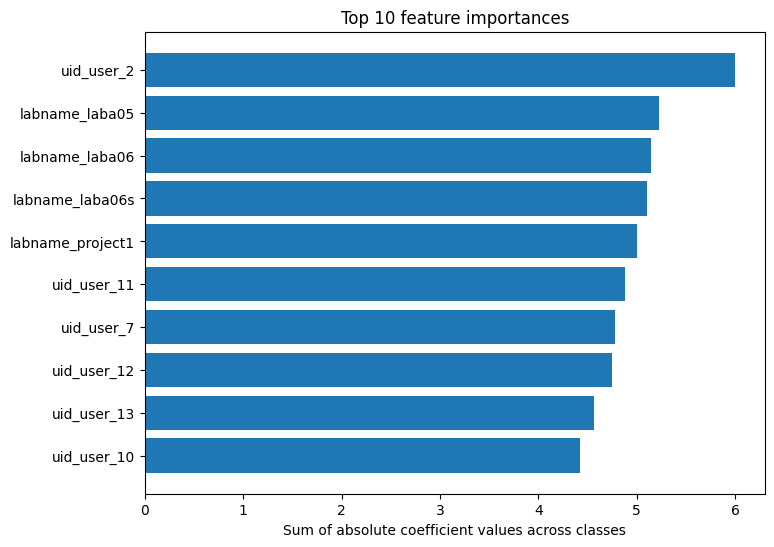

In [152]:
coef_matrix = np.array([est.coef_[0] for est in svc_linear.estimators_])
plot_top_coefficients(coef_matrix, feature_names, top_n=10)


### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [153]:
clf_decisionTree = DecisionTreeClassifier(max_depth=4, random_state=21)
clf_decisionTree.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [154]:
y_pred = clf_decisionTree.predict(X)
y_pred[:10]

array([3, 3, 3, 3, 3, 3, 3, 5, 5, 5], dtype=int32)

In [155]:
accuracy_decisionTree = accuracy_score(y, y_pred)
accuracy_decisionTree

0.5516014234875445

In [156]:
max_depths = [2, 3, 4, 5, 6]
best_accuracy = 0
best_depth = 0

for depth in max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=21)
    dt_temp.fit(X, y)
    y_pred_temp = dt_temp.predict(X)
    accuracy_temp = accuracy_score(y, y_pred_temp)
    
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        best_depth = depth
best_depth

6

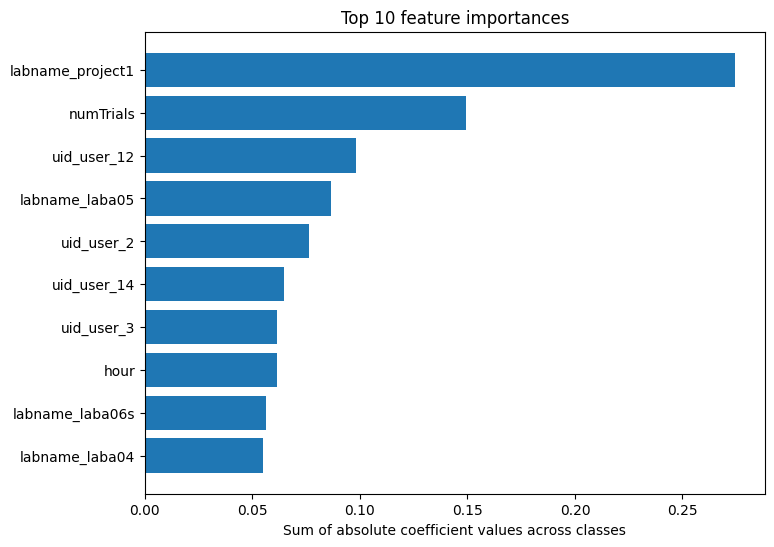

In [157]:
feature_importance = clf_decisionTree.feature_importances_
coef_matrix = feature_importance.reshape(1, -1)

plot_top_coefficients(coef_matrix, feature_names, top_n=10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [158]:
clf_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=25,
    random_state=21
)

clf_rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [159]:
y_pred_rf = clf_rf.predict(X)

accuracy_rf = accuracy_score(y, y_pred_rf)
accuracy_rf


1.0

In [160]:
best_accuracy = accuracy_rf
best_depth = 25
best_estimator = 100

for depth in [10, 15, 20, 25, 30, None]:
    for estimator in [50, 100, 150, 200, 250]:
        rf_temp = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=21)
        rf_temp.fit(X, y)
        y_pred_temp = rf_temp.predict(X)
        accuracy_temp = accuracy_score(y, y_pred_temp)
        
        if accuracy_temp > best_accuracy:
            best_accuracy = accuracy_temp
            best_depth = depth
            best_estimator = estimator
(best_depth, best_estimator, best_accuracy)

(25, 100, 1.0)

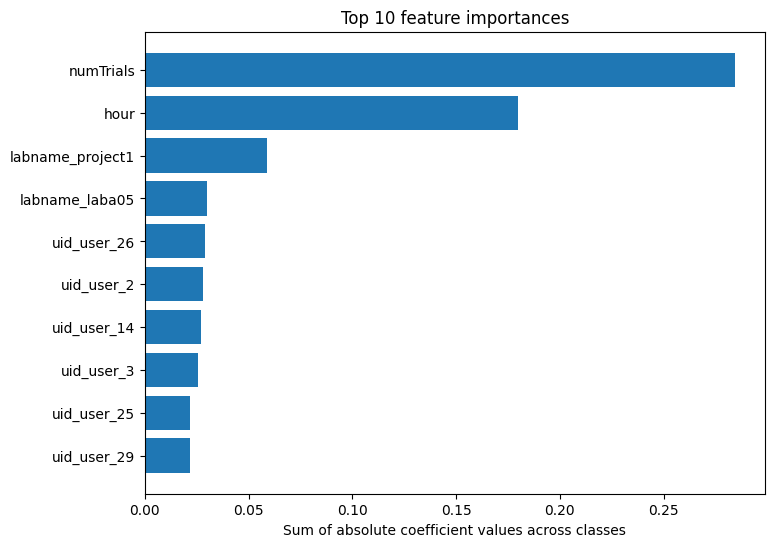

In [161]:
feature_importance = clf_rf.feature_importances_
coef_matrix = feature_importance.reshape(1, -1)

plot_top_coefficients(coef_matrix, feature_names, top_n=10)